<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Ridge Regularization
<a class="anchor" id="1"></a> 

| |<font size="5">Ridge نموذج </font>|
|-:|-:|
|<img src="https://cdn-images-1.medium.com/max/800/1*XC-8tHoMxrO3ogHKylRfRA.png" width=400></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4"> Regularization الضبط في نماذج تعلم الآلة </font>| 
||<font size="4">Ridge  توظيف خوارزمية </font>| 
||<font size="4"> training   تدريب البيانات </font>| 
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>|

### Regularization   الضبط في نماذج تعلم الآلة
 
 

![](https://i0.wp.com/www.nmthgiat.com/wp-content/uploads/2019/04/Overfitting.png?resize=554%2C158&ssl=1)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200107015710/HighBias.jpg)

$\large h_\theta(x)= g(\theta_0 +\theta_1 x_1 + \theta_2 x_2) $

درجة تباين عالية

![](https://miro.medium.com/max/700/1*szpOBWtAkMwFkvVTBCGjqg.png)


$\large h_\theta(x)= g(\theta_0 +\theta_1 x + \theta_2 x^2+\theta_3 x^3+\theta_4 x^4) $


![](https://i1.wp.com/www.nmthgiat.com/wp-content/uploads/2019/04/beforeafter.png?resize=537%2C220&ssl=1)


- أفضل النماذج ملاءمة تكمن في  فرضية نقطة المقايضة 
![](https://media.geeksforgeeks.org/wp-content/uploads/20200107023418/1_oO0KYF7Z84nePqfsJ9E0WQ.png)

![](https://miro.medium.com/max/700/1*OLh18FDyOhIEG5idV4kXFQ.png)

In [ ]:
pwd

'/content/drive/My Drive/ML-Course'

In [ ]:
# Data Loading
import pandas as pd
df= pd.read_csv("../data/HousePrice3.csv", index_col=0)

In [2]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


![](../imgs/featureEngin.png)

![](../data/features_kept1.csv)

![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [3]:
df.select_dtypes("number").corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [4]:
# قائمة المتغيرات الأكثر ارتباطا 

corr = df.select_dtypes("number").corr()['SalePrice'].sort_values(ascending=False)
corr[:5]
#SalePrice الاكتفاء بالمتغيرات الأكثر ارتباطا ب   

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

![](../imgs/target.jpeg)

In [5]:
X=df[["OverallQual" ,"GrLivArea" , "GarageArea" , "TotalBsmtSF" ]]
y=df.SalePrice 

![](../imgs/dataSplit.jpg)

In [6]:
# تقسيم البيانات 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [7]:
#  معالجة البيانات المتطرفة وإإعادة توزيعها
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###  RIdhe Model

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

$\Large  RSS_{Ridge}= \sum (Y_i -\hat Y_i )^2 + \alpha\sum\beta_i^2  $

$\Large  RSS_{Ridge}= \sum (Y_i -\beta_0 -\beta_iX_i )^2 + \alpha\sum\beta_i^2  $

![](../imgs/model.png)

In [8]:

from sklearn.linear_model import Ridge

linRidge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

![](../imgs/metrics.png)

In [9]:
linRidge.coef_


array([153967.54184004,  94814.42818117,  98276.85818078,  59617.62543581])

In [10]:
linRidge.coef_.mean()

np.float64(101669.1134094499)

In [11]:
f'y intercept  :{linRidge.intercept_:.3}    : y  تقاطع  '

'y intercept  :2.88e+04    : y  تقاطع  '

In [12]:
# المعادلة 


In [13]:
#  التنبؤ
y_pred = linRidge.predict(X_test_scaled)

In [14]:
# تقويم  النموذج 
from sklearn import metrics 
f' Score :  {metrics.r2_score(y_test, y_pred):.3}'

' Score :  0.637'

In [15]:
linRidge.score(X_test_scaled, y_test)

0.6371039316346094

In [16]:
f' Score :  {metrics.mean_absolute_error(y_test, y_pred):.3}'

' Score :  3.03e+04'

In [17]:
import numpy as np
f' RMSE :  {np.sqrt(metrics.mean_absolute_error(y_test, y_pred)):.3}'

' RMSE :  1.74e+02'

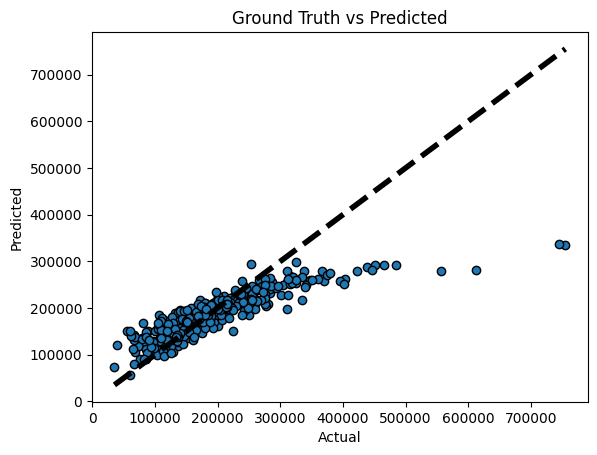

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
np.exp(y.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    inf
1    inf
2    inf
3    inf
4    inf
Name: SalePrice, dtype: float64

In [ ]:
# Import necessary libraries
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# linRidge is your linear regression model (or Ridge if you're using regularization)
# X_train_scaled and y_train are your scaled training features and target

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    linRidge, X_train_scaled, y_train, cv=5, scoring="r2", n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)  # Adjust train sizes (10 points from 10% to 100%)
)


In [24]:
# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

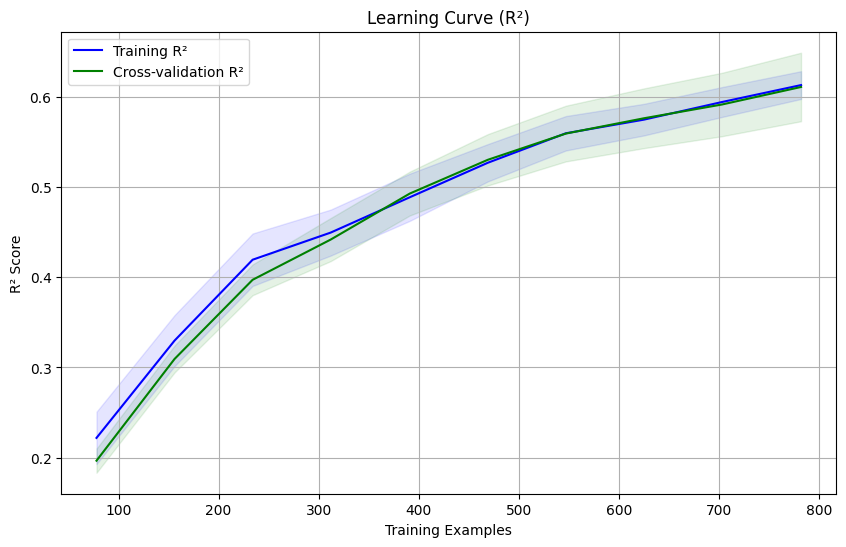

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training R²", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation R²", color="green")

# Add shaded areas for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="green")

# Add labels and title
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.title("Learning Curve (R²)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [ ]:

alphas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
# enumerate through alphas with index and i
for  i in  alphas:    
    reg = Ridge(alpha = i)
    reg.fit(X_train, y_train)
    print(f'Ridge Regression: R^2 score on test set for  lamdbda= {i}, {reg.score(X_test, y_test):.3}')


Ridge Regression: R^2 score on test set for  lamdbda= 0.001, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 0.01, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 0.1, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 0.5, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 1, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 2, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 10, 0.786


In [29]:
# 
alphas = np.logspace(-7, 30, 10)
# enumerate through alphas with index and i
for  i in  alphas:    
    reg = Ridge(alpha = i)
    reg.fit(X_train, y_train)
    print(f'Ridge Regression: R^2 score on test set for  alpha= {i}, {reg.score(X_test, y_test):.3}')


Ridge Regression: R^2 score on test set for  alpha= 1e-07, 0.785
Ridge Regression: R^2 score on test set for  alpha= 0.0012915496650148827, 0.785
Ridge Regression: R^2 score on test set for  alpha= 16.681005372000556, 0.785
Ridge Regression: R^2 score on test set for  alpha= 215443.46900318778, 0.718
Ridge Regression: R^2 score on test set for  alpha= 2782559402.2071147, 0.125
Ridge Regression: R^2 score on test set for  alpha= 35938136638046.11, -8.36e-06
Ridge Regression: R^2 score on test set for  alpha= 4.641588833612753e+17, -1.98e-05
Ridge Regression: R^2 score on test set for  alpha= 5.994842503189372e+21, -1.98e-05
Ridge Regression: R^2 score on test set for  alpha= 7.742636826811214e+25, -1.98e-05
Ridge Regression: R^2 score on test set for  alpha= 1e+30, -1.98e-05


In [30]:



from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import numpy as np

alphas=np.logspace(-7, 30, 10)
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(estimator=Ridge(), 
                                              X=X_train, 
                                              y=y_train,
                                              param_name="alpha" ,
                                              param_range=alphas, 
                                              cv=10
 )

In [31]:
train_scores

array([[7.22537691e-01, 7.46056015e-01, 7.38407382e-01, 7.73729247e-01,
        7.23900383e-01, 7.30761118e-01, 7.26767074e-01, 7.26390876e-01,
        7.31372057e-01, 7.25847535e-01],
       [7.22537691e-01, 7.46056015e-01, 7.38407382e-01, 7.73729247e-01,
        7.23900383e-01, 7.30761118e-01, 7.26767074e-01, 7.26390876e-01,
        7.31372057e-01, 7.25847535e-01],
       [7.22496359e-01, 7.46016056e-01, 7.38366321e-01, 7.73695511e-01,
        7.23858192e-01, 7.30719989e-01, 7.26726048e-01, 7.26349111e-01,
        7.31331869e-01, 7.25807248e-01],
       [6.03727076e-01, 6.34932212e-01, 6.24907606e-01, 6.86995937e-01,
        6.00693014e-01, 6.18411710e-01, 6.09877083e-01, 6.19550559e-01,
        6.10941886e-01, 6.10805384e-01],
       [1.12363414e-01, 1.15252740e-01, 1.15935488e-01, 1.17499765e-01,
        1.10203693e-01, 1.16417464e-01, 1.11202771e-01, 1.15366149e-01,
        1.15732594e-01, 1.13837476e-01],
       [1.02488772e-05, 1.04447108e-05, 1.05772707e-05, 1.05274734e-05,
   

In [32]:
test_scores

array([[ 8.17322481e-01,  5.93829133e-01,  6.79095432e-01,
         3.87258719e-01,  7.93127338e-01,  7.56214470e-01,
         8.07214197e-01,  8.06001581e-01,  7.59564348e-01,
         7.96136575e-01],
       [ 8.17322515e-01,  5.93829138e-01,  6.79095488e-01,
         3.87258383e-01,  7.93127367e-01,  7.56214471e-01,
         8.07214289e-01,  8.06001583e-01,  7.59564478e-01,
         7.96136584e-01],
       [ 8.17727429e-01,  5.93838311e-01,  6.79750147e-01,
         3.82956328e-01,  7.93473727e-01,  7.56186226e-01,
         8.08337277e-01,  8.05955108e-01,  7.61168869e-01,
         7.96212651e-01],
       [ 7.50706912e-01,  4.63393767e-01,  5.73843849e-01,
         6.65297900e-02,  7.43723020e-01,  6.38100057e-01,
         7.41150980e-01,  6.30791461e-01,  7.42308113e-01,
         7.02480470e-01],
       [ 1.03609468e-01,  1.17090357e-01,  1.13816906e-01,
         8.92884475e-02,  1.10238216e-01,  9.97070762e-02,
         1.42694823e-01,  1.10378838e-01,  1.20470722e-01,
         1.

If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well. A low training score and a high validation score is usually not possible. All three cases can be found in the plot below where we vary the parameter  of an SVM on the digits dataset.

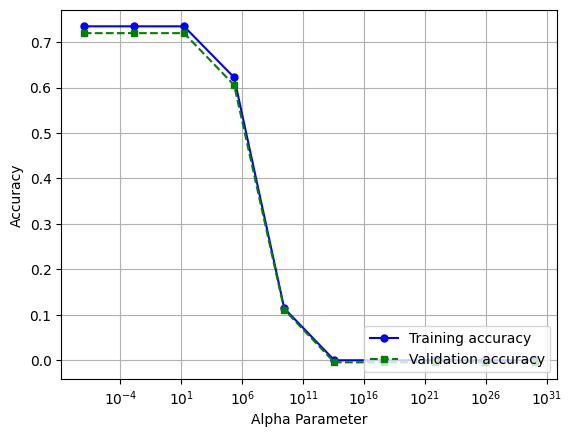

In [33]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(alphas, train_mean, color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(alphas, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
plt.grid()
plt.xscale('log')

plt.xlabel('Alpha Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1.03])
plt.show()

In [34]:
np.power(10,3)

np.int64(1000)

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [36]:


linRidge = Ridge(alpha=10).fit(X_train_scaled, y_train)

In [37]:
# تخطيط التعلّم 
import scikitplot as skplt

skplt.estimators.plot_learning_curve(linRidge, X_train_scaled, y_train, scoring="r2") # neg_mean_absolute_error")

ImportError: cannot import name 'interp' from 'scipy' (/home/codespace/.local/lib/python3.12/site-packages/scipy/__init__.py)